In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv('../../Dataset/x_train_all.csv')
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')

In [3]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy') 

In [4]:
# Train the classifier on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [5]:
# Predict on the training set
train_predictions = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy on Training Set: {train_accuracy}")

Accuracy on Training Set: 1.0


In [6]:
# Predict on the testing set
test_predictions = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy on Test Set: {test_accuracy}")

Accuracy on Test Set: 0.7249190938511327


In [7]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.52      0.57      0.54        60
           1       0.72      0.79      0.75       720
           2       0.76      0.76      0.76       750
           3       0.73      0.72      0.73       450
           4       0.81      0.76      0.78       660
           5       0.63      0.60      0.62        60
           6       0.49      0.47      0.48        90
           7       0.43      0.35      0.39        60
           8       0.67      0.64      0.65       150
           9       0.51      0.48      0.49        90

    accuracy                           0.72      3090
   macro avg       0.63      0.61      0.62      3090
weighted avg       0.72      0.72      0.72      3090



In [8]:
# Calculating precision, recall, and F1-score for each class
precision = precision_score(y_test, test_predictions, average=None)
recall = recall_score(y_test, test_predictions, average=None)
f1 = f1_score(y_test, test_predictions, average=None)


In [9]:
#Creating dataframe of precision, recall, and F1-score for each class
df = pd.DataFrame({'Precision': precision, 'F1 Score': f1, 'Recall': recall})
df

,Precision,F1 Score,Recall
0,0.515152,0.539683,0.566667
1,0.723567,0.754817,0.788889
2,0.760956,0.762475,0.764000
3,0.734234,0.729306,0.724444
4,0.805466,0.781591,0.759091
5,0.631579,0.615385,0.600000
6,0.488372,0.477273,0.466667
7,0.428571,0.385321,0.350000
8,0.666667,0.653061,0.640000
9,0.511905,0.494253,0.477778


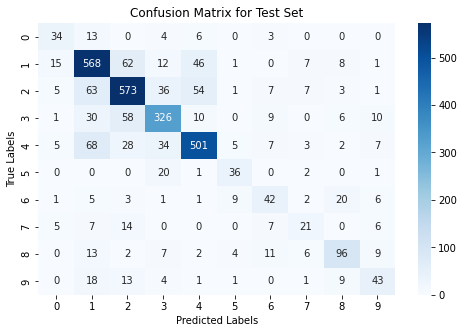

In [10]:
# Generate and visualize the confusion matrix for the test set
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()
